In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append('../terrain-erosion-3-ways/')
from river_network import *

sys.path.append("../pipeline")
from svg_extraction import SVGExtractor
from svg_extraction import (get_coast_coordinates, get_heightline_centers)
from skimage.segmentation import flood, flood_fill
from skimage.morphology import opening, square

import numpy as np

from omegaconf import OmegaConf

import matplotlib.pyplot as plt
import png
import PIL

import ipywidgets as widgets
from IPython.display import display
import glob

import logging
logger = logging.getLogger()

In [3]:
paths = glob.glob("../svgs/*.svg")
paths.sort()
realm_selection = widgets.Dropdown(
    options=paths,
    description='svg:',
    disabled=False,
)
display(realm_selection)

Dropdown(description='svg:', options=('../svgs/1.svg', '../svgs/10.svg', '../svgs/100.svg', '../svgs/101.svg',…

In [4]:
config = OmegaConf.load("../pipeline/config.yaml")

# exp

In [5]:
from run import run_pipeline

INFO:realms:Setting up extractor


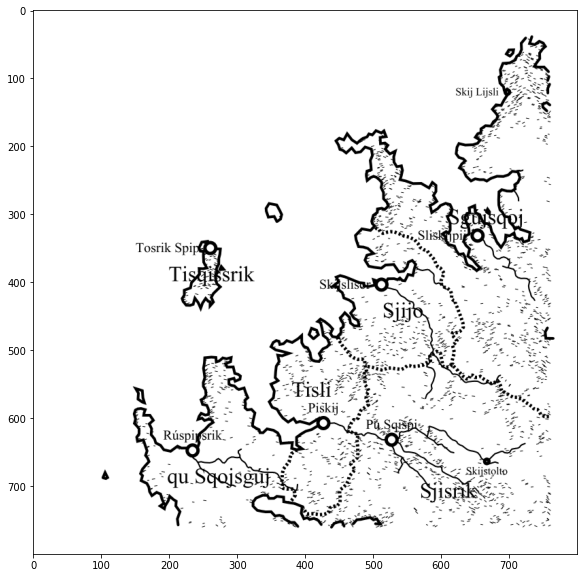

INFO:realms:    \---DONE
INFO:realms:Extracting coast
INFO:realms:    \---DONE
INFO:realms:Extracting heightlines
INFO:realms:    \---DONE
INFO:realms:Starting ground-sea mask logic


8
9
0


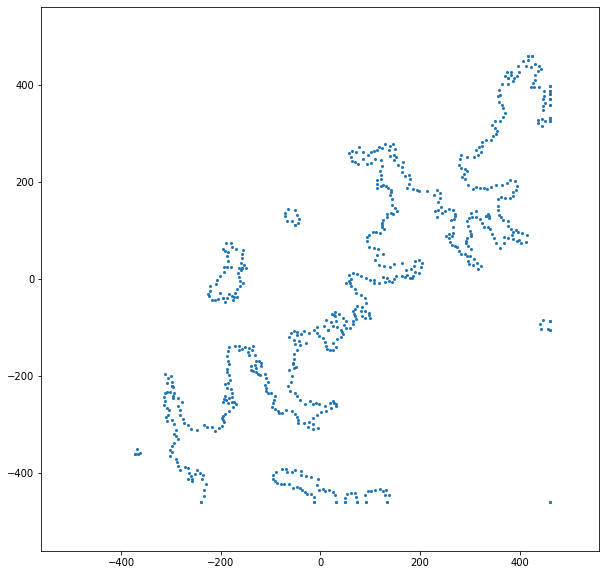

DEBUG:realms:mask_shape: (800, 800)


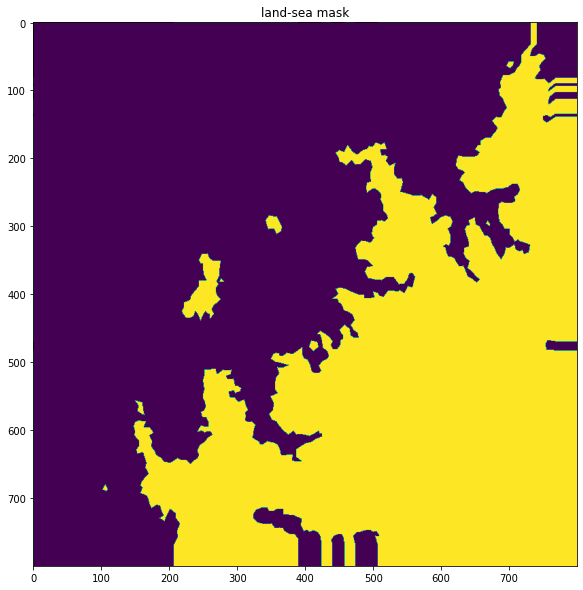

INFO:realms:    \---DONE
INFO:realms:----Extracting rivers
../pipeline/run.py:99: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  rivers = skimage.filters.gaussian(rivers, sigma=1.2)[...,0] # rivers is now [0,1]


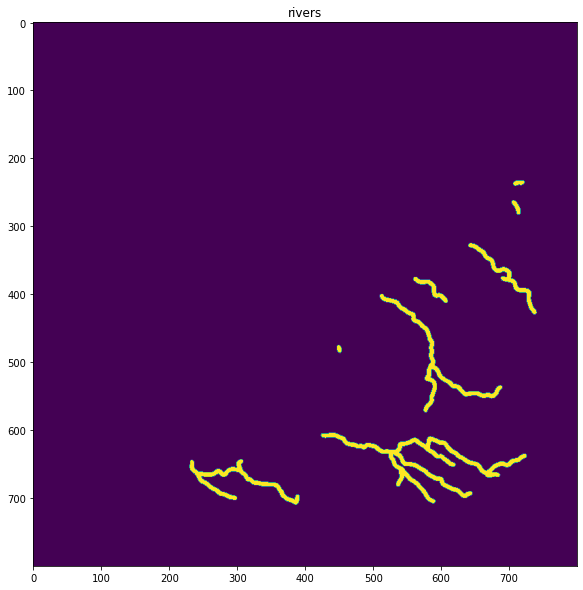

INFO:realms:    \---DONE
INFO:realms:----Combining coast and rivers


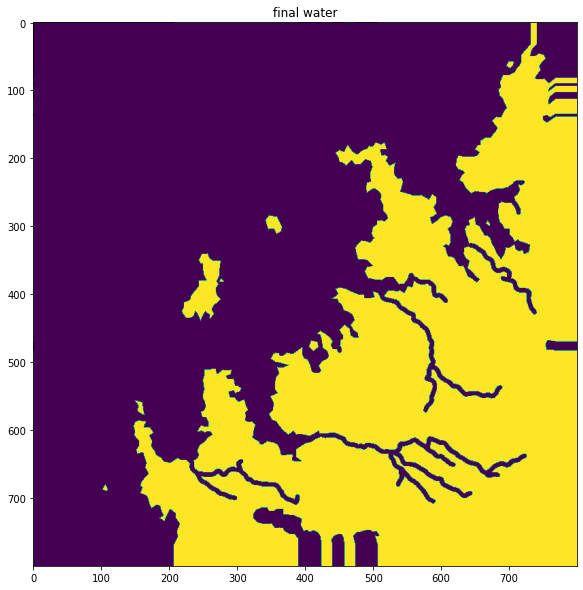

INFO:realms:    \---DONE
INFO:realms:----Terrain generation


  ...initial terrain shape
  ...sampling points
  ...delaunay triangulation
  ...initial height map
  ...river network
  ...final terrain height


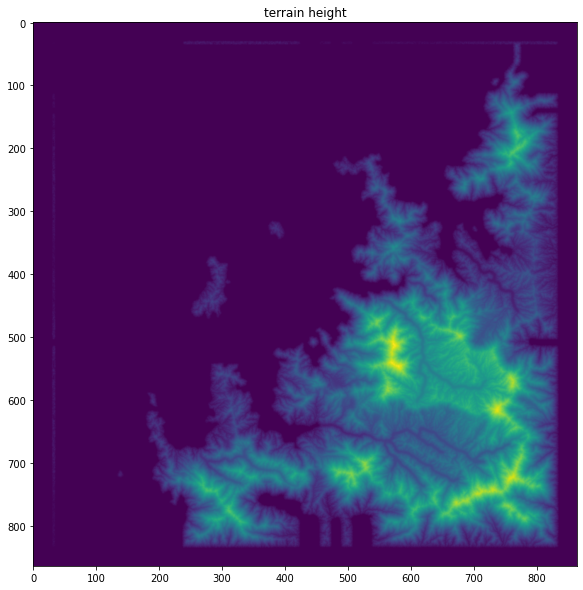

INFO:realms:    \---DONE
INFO:realms:----Underwater generation


  ...initial terrain shape
  ...sampling points
  ...delaunay triangulation
  ...initial height map
  ...river network
  ...final terrain height


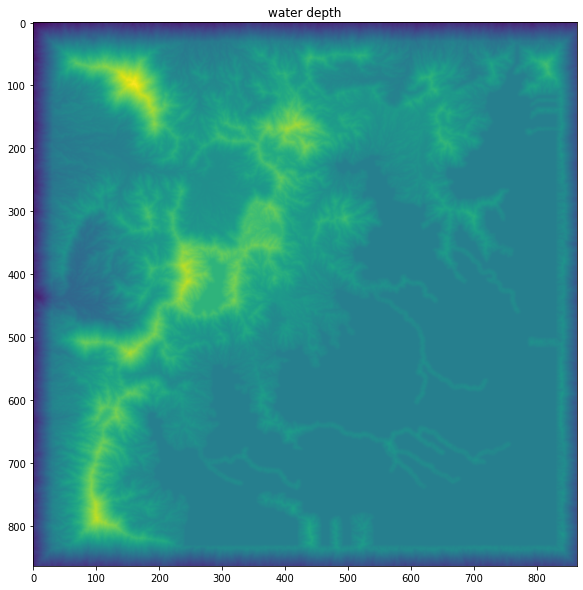

INFO:realms:    \---DONE
INFO:realms:----Combining terrain and water heights


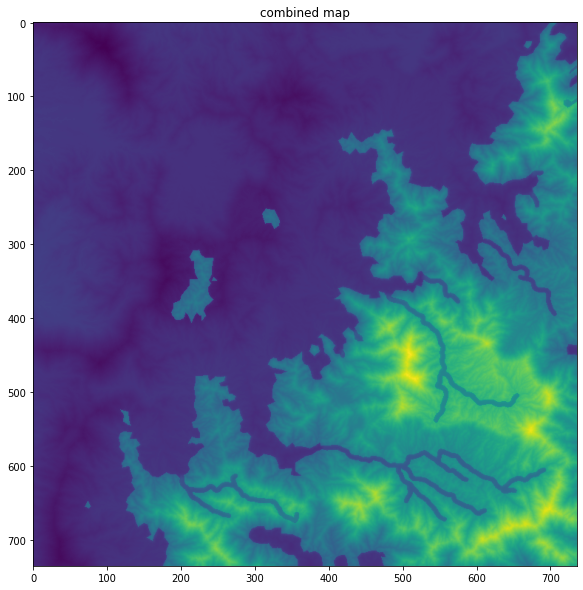

INFO:realms:    \---DONE
INFO:realms:Exporting height map
INFO:realms:    \---DONE
INFO:realms:Coloring
INFO:realms:Injected water pixel at 0, 1.
INFO:realms:    \---DONE
INFO:realms:Exporting color map
INFO:realms:    \---DONE
INFO:realms:Finding index of water tile
DEBUG:realms:water_index: 19
INFO:realms:    \---DONE


In [6]:
config = OmegaConf.load("../pipeline/config.yaml")
debug_data = run_pipeline(realm_selection.value, config, debug=True)

In [7]:
from coloring import run_coloring, colorize_perlin
from coloring import moderate, snow, savanna, desert, cold

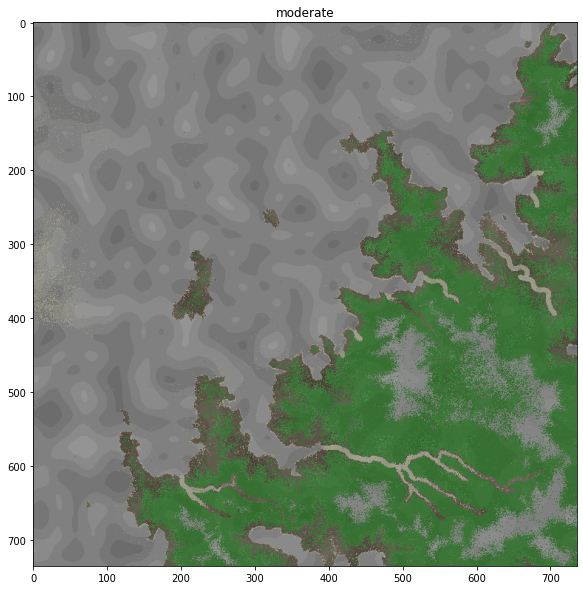

In [9]:
colormap = run_coloring(moderate, debug_data["combined"])
plt.figure(figsize=(10,10))
plt.title("moderate")
plt.imshow(colormap/255)

In [ ]:
raise False

In [40]:
import sys

from pyvox.parser import VoxParser
from pyvox.writer import VoxWriter
from pyvox.models import Material

import click
import json

donor = VoxParser("../MagicaVoxel-0.99.6.4-win64/vox/fmap_0001.vox")
m_donor = donor.parse()

test2
custom version
Found chunk id b'MAIN' / len 0 / children 20241581
Found chunk id b'PACK' / len 4 / children 0
Found chunk id b'SIZE' / len 12 / children 0
Found chunk id b'XYZI' / len 598576 / children 0
xyzi block with %d voxels (len %d) 149643 598576
Found chunk id b'SIZE' / len 12 / children 0
Found chunk id b'XYZI' / len 709176 / children 0
xyzi block with %d voxels (len %d) 177293 709176
Found chunk id b'SIZE' / len 12 / children 0
Found chunk id b'XYZI' / len 601172 / children 0
xyzi block with %d voxels (len %d) 150292 601172
Found chunk id b'SIZE' / len 12 / children 0
Found chunk id b'XYZI' / len 919072 / children 0
xyzi block with %d voxels (len %d) 229767 919072
Found chunk id b'SIZE' / len 12 / children 0
Found chunk id b'XYZI' / len 1014216 / children 0
xyzi block with %d voxels (len %d) 253553 1014216
Found chunk id b'SIZE' / len 12 / children 0
Found chunk id b'XYZI' / len 819596 / children 0
xyzi block with %d voxels (len %d) 204898 819596
Found chunk id b'SIZE' /

In [41]:
print([k for k in m_donor.__dict__])

['models', 'default_palette', '_palette', 'materials', 'remnants']


In [42]:
from struct import unpack_from as unpack, calcsize
cnt = 0
for c in m_donor.remnants:
    if c.id == b"nTRN":
        print(c.__dict__)
        print(c.content[-16:])
        trans = c.content[-16:].split(b"\x00")[-1]
        trans = trans.split(b" ")
        print(trans)
        print(unpack("h", c.content[-2:]))
        cnt += 1
print(cnt)


{'id': b'nTRN', 'content': b'H\x00\x00\x00\x00\x00\x00\x00I\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x01\x00\x00\x00\x02\x00\x00\x00\x02\x00\x00\x00_r\x01\x00\x00\x002\x02\x00\x00\x00_t\r\x00\x00\x00-298 -298 256', 'chunks': [], 'material': None}
b'\x00\x00\x00-298 -298 256'
[b'-298', b'-298', b'256']
(13877,)
{'id': b'nTRN', 'content': b'F\x00\x00\x00\x00\x00\x00\x00G\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x01\x00\x00\x00\x02\x00\x00\x00\x02\x00\x00\x00_r\x01\x00\x00\x002\x02\x00\x00\x00_t\r\x00\x00\x00-298 -426 256', 'chunks': [], 'material': None}
b'\x00\x00\x00-298 -426 256'
[b'-298', b'-426', b'256']
(13877,)
{'id': b'nTRN', 'content': b'D\x00\x00\x00\x00\x00\x00\x00E\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x01\x00\x00\x00\x02\x00\x00\x00\x02\x00\x00\x00_r\x01\x00\x00\x002\x02\x00\x00\x00_t\r\x00\x00\x00-298 -554 256', 'chunks': [], 'material': None}
b'\x00\x00\x00-298 -554 256'
[b'-298', b'-554', b'256']
(13877,)
{'id': b'nTRN', 'content': b'B\x00\x00\x00\x00\x00\x00\

(800, 800)


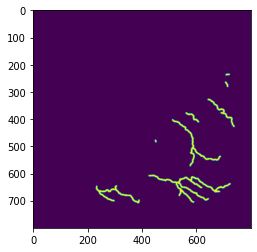

In [45]:
# def find_rivers
print(debug_data["rivers"].shape)
plt.imshow(debug_data["rivers"])

In [46]:


for model in m_donor.models:
    pts = []
    for voxel in model.voxels:
#         print(voxel)
        if voxel.y == 10:
            pts.append((voxel.x, voxel.z))
    if len(pts)
    plt.figure(figsize=(10,10))
    pts = np.asarray(pts)
    plt.scatter(pts[:,0], pts[:,1], s=0.1)
    plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 720x720 with 0 Axes>